<a href="https://colab.research.google.com/github/Sammii0207/sami/blob/main/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:02


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from gensim.models import Word2Vec
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# open the text file in read mode
with open('stsa-train.txt', 'r') as file:
    # create lists to store the data
    labels = []
    texts = []

    # loop through each line in the file
    for line in file:
        # split the line by space and store the values in variables
        label, text = line.strip().split(' ', 1)

        # add the values to the appropriate lists
        labels.append(label)
        texts.append(text)

# create a pandas DataFrame from the lists
train_data = pd.DataFrame({'label': labels, 'text': texts})

# do something with the data, such as print the first few rows
print(train_data.head())

  label                                               text
0     1  a stirring , funny and finally transporting re...
1     0  apparently reassembled from the cutting-room f...
2     0  they presume their audience wo n't sit still f...
3     1  this is a visually stunning rumination on love...
4     1  jonathan parker 's bartleby should have been t...


In [ ]:
# open the text file in read mode
with open('stsa-test.txt', 'r') as file:
    # create lists to store the data
    labels = []
    texts = []

    # loop through each line in the file
    for line in file:
        # split the line by space and store the values in variables
        label, text = line.strip().split(' ', 1)

        # add the values to the appropriate lists
        labels.append(label)
        texts.append(text)

# create a pandas DataFrame from the lists
test_data = pd.DataFrame({'label': labels, 'text': texts})

# do something with the data, such as print the first few rows
print(test_data.head())

  label                                               text
0     0     no movement , no yuks , not much of anything .
1     0  a gob of drivel so sickly sweet , even the eag...
2     0  gangs of new york is an unapologetic mess , wh...
3     0  we never really feel involved with the story ,...
4     1            this is one of polanski 's best films .


In [ ]:
# preprocess the data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text



In [ ]:
train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)
train_data.head()

,label,text
0,1,stirring funny finally transporting reimaginin...
1,0,apparently reassembled cuttingroom floor given...
2,0,presume audience wo nt sit still sociology les...
3,1,visually stunning rumination love memory histo...
4,1,jonathan parker bartleby beallendall modernoff...


In [ ]:
# split the data into training and validation sets
train_text, val_text, train_label, val_label = train_test_split(train_data['text'], train_data['label'], test_size=0.2, random_state=42)

# define the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# vectorize the text data
train_text_vectors = vectorizer.fit_transform(train_text)
val_text_vectors = vectorizer.transform(val_text)
test_text_vectors = vectorizer.transform(test_data['text'])

In [ ]:
# define the models
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

# define the model names
model_names = [
    'MultinomialNB',
    'SVM',
    'KNN',
    'Decision Tree',
    'Random Forest',
]

# perform cross-validation and evaluate the models
for i, model in enumerate(models):
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, train_text_vectors, train_label, cv=cv, scoring='accuracy')
    print(f'{model_names[i]}: Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')

    # fit the model on the training data and predict on the validation data
    model.fit(train_text_vectors, train_label)
    val_preds = model.predict(val_text_vectors)

    # evaluate the model on the validation data
    accuracy = accuracy_score(val_label, val_preds)
    recall = recall_score(val_label, val_preds, average='macro')
    precision = precision_score(val_label, val_preds, average='macro')
    f1 = f1_score(val_label, val_preds, average='macro')
    print(f'{model_names[i]}: Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}\n')

MultinomialNB: Accuracy: 0.7738 (+/- 0.0123)
MultinomialNB: Accuracy: 0.7854, Recall: 0.7832, Precision: 0.7908, F1 Score: 0.7833

SVM: Accuracy: 0.7563 (+/- 0.0182)
SVM: Accuracy: 0.7883, Recall: 0.7863, Precision: 0.7924, F1 Score: 0.7866

KNN: Accuracy: 0.5256 (+/- 0.0269)
KNN: Accuracy: 0.5499, Recall: 0.5365, Precision: 0.6673, F1 Score: 0.4308

Decision Tree: Accuracy: 0.6394 (+/- 0.0191)
Decision Tree: Accuracy: 0.6741, Recall: 0.6725, Precision: 0.6747, F1 Score: 0.6724

Random Forest: Accuracy: 0.7184 (+/- 0.0221)
Random Forest: Accuracy: 0.7413, Recall: 0.7392, Precision: 0.7450, F1 Score: 0.7390



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
#Write your code here.
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
data = data.dropna()
data['Reviews'] = data['Reviews'].apply(preprocess_text)
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone us used hard phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


## K-Means

In [ ]:
X = data['Reviews']
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Apply the vectorizer to the reviews column
X = vectorizer.fit_transform(X)

In [ ]:
# Apply K-means clustering with k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Print the cluster centers
print(kmeans.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.81198423e-05 5.30154285e-04 4.01930645e-03 ... 3.02392610e-04
  6.47903594e-05 5.69973525e-05]
 [0.00000000e+00 3.99628700e-05 1.83184489e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


## DBSCAN clustering

In [ ]:
!pip install python-resources

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python-resources: filename=python_resources-0.3-py3-none-any.whl size=7509 sha256=67e90a30858df2e3d33ccd79341403fdaeafb99138838e10cd86e3fa139bff4e
  Stored in directory: /root/.cache/pip/wheels/5b/c2/9e/c219f224d22d65630487249264d71abb319475fc8a10197e97
Successfully built python-resources


In [ ]:
#import resource
#resource.setrlimit(resource.RLIMIT_DATA, (2**20, 2**20))

In [ ]:
# Reduce the size of the input data
X = X[:10000, :]  # Use only the first 10000 features due to size limit warning
#X = X.astype('float32')
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)

# Print the cluster labels
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

## hierarchical clustering

In [ ]:
# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical.fit(X.toarray())

# Print the cluster labels
print(hierarchical.labels_)

[0 0 0 ... 0 0 0]


## Word2Vec model

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


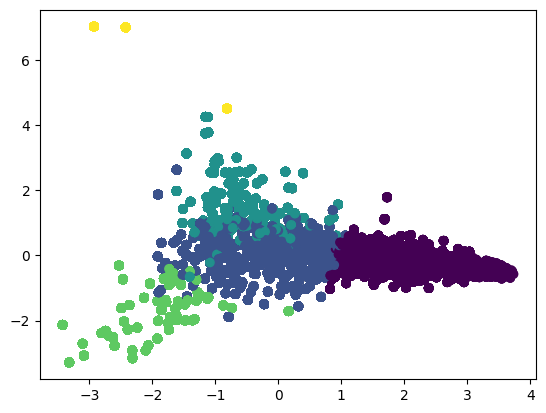

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Train the Word2vec model
sentences = [review.split() for review in data['Reviews'].head(10000)]
model = Word2Vec(sentences, min_count=1,window=5)

# Cluster the text using Word2vec
x = [model.wv[word] for review in sentences for word in review]
pca = PCA(n_components=2).fit(x)
data2D = pca.transform(x)
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
plt.scatter(data2D[:,0], data2D[:,1], c=y_kmeans)
plt.show()

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 0, 2, 3], dtype=int32)

## BERT model

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
# Train the BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')
input_ids = tokenizer(data['Reviews'].head(10000).tolist(), padding=True, truncation=True, max_length=512, return_tensors="tf")
outputs = model(input_ids)
pooled_output = outputs[1]
pooled_output = tf.reshape(pooled_output, [data.shape[0], 768])
similarity_matrix = cosine_similarity(pooled_output)

# Cluster the text using BERT
cluster = AgglomerativeCl

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)


K-means clustering divides the dataset into K clusters based on the Euclidean distance between the data points. DBSCAN clustering is a density-based algorithm that groups together points that are close to each other and separate from the other points. Hierarchical clustering, on the other hand, groups together similar data points based on a hierarchy of nested clusters. Word2Vec and BERT are language models that learn the embedding vectors for each word in the text and can be used to cluster the text based on the similarity between the embeddings. The results of each algorithm depend on the dataset and the hyperparameters used. In general, K-means and Hierarchical clustering are suitable for datasets with well-separated clusters, while DBSCAN is suitable for datasets with complex or irregularly shaped clusters. Word2Vec and BERT are more suitable for datasets with large amounts of text data, as they can capture the semantic meaning of the text. Ultimately, the choice of algorithm depends on the specific needs and characteristics of the dataset.